In [ ]:
# === Import Libraries ===
# Data manipulation and analysis
import pandas as pd

import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Machine Learning
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# Settings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the train and test datasets
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
# Display the first few rows of the datasets and their shape
display("Train", train.head(), train.shape, "Test", test.head(), test.shape)

'Train'

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0


(68654, 16)

'Test'

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.0,1989.0,2022-07-27,2022-08-03,7,Repeat Loan,575.7,0.300000,597.0
1,ID_255356300042267278,255356,Kenya,300042,267278,Type_1,2138.0,2153.0,2022-11-16,2022-11-23,7,Repeat Loan,0.0,0.000000,0.0
2,ID_257026243764267278,257026,Kenya,243764,267278,Type_1,8254.0,8304.0,2022-08-24,2022-08-31,7,Repeat Loan,207.0,0.025079,208.0
3,ID_264617299409267278,264617,Kenya,299409,267278,Type_1,3379.0,3379.0,2022-11-15,2022-11-22,7,Repeat Loan,1013.7,0.300000,1014.0
4,ID_247613296713267278,247613,Kenya,296713,267278,Type_1,120.0,120.0,2022-11-10,2022-11-17,7,Repeat Loan,36.0,0.300000,36.0


(18594, 15)

In [ ]:
# Examine data types and check for missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   Total_Amount                 68654 non-null  float64
 7   Total_Amount_to_Repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  New_versus_Repeat            68654 non-null  object 
 12  Amount_Funded_By_Lender      68654 non-null  float64
 13  Lender_portion_F

In [ ]:
# Check for missing values in the train dataset
print(f"There are {train.isna().sum().sum()} missing values in the data.")

There are 0 missing values in the data.


## <a id="5"></a>Feature Engineering
We'll combine train and test data for consistent feature engineering.

The shape of train_df is: (68654, 46)
The shape of test_df is: (18594, 46)
Features selected for modeling: ['Total_Amount', 'Total_Amount_to_Repay', 'duration', 'New_versus_Repeat', 'Amount_Funded_By_Lender', 'Lender_portion_Funded', 'Lender_portion_to_be_repaid', 'disbursement_date_month', 'disbursement_date_day', 'disbursement_date_year', 'due_date_month', 'due_date_day', 'due_date_year', 'loan_term_days', 'disbursement_weekday', 'due_weekday', 'repayment_ratio', 'log_Total_Amount', 'loan_type_Type_1', 'loan_type_Type_10', 'loan_type_Type_11', 'loan_type_Type_12', 'loan_type_Type_13', 'loan_type_Type_14', 'loan_type_Type_15', 'loan_type_Type_16', 'loan_type_Type_17', 'loan_type_Type_18', 'loan_type_Type_19', 'loan_type_Type_2', 'loan_type_Type_20', 'loan_type_Type_21', 'loan_type_Type_22', 'loan_type_Type_23', 'loan_type_Type_24', 'loan_type_Type_3', 'loan_type_Type_4', 'loan_type_Type_5', 'loan_type_Type_6', 'loan_type_Type_7', 'loan_type_Type_8', 'loan_type_Type_9']


Original training set shape: (68654, 42), {0.0: 67396, 1.0: 1258}
Resampled training set shape: (134792, 42), {0.0: 67396, 1.0: 67396}


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, stratify=y_resampled, shuffle=True,random_state=42)

print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)


(101094, 42) (33698, 42) (101094,) (33698,)


In [ ]:
X_train

,Total_Amount,Total_Amount_to_Repay,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,disbursement_date_month,disbursement_date_day,disbursement_date_year,...,loan_type_Type_22,loan_type_Type_23,loan_type_Type_24,loan_type_Type_3,loan_type_Type_4,loan_type_Type_5,loan_type_Type_6,loan_type_Type_7,loan_type_Type_8,loan_type_Type_9
69761,10086.801487,12720.296838,16,1,2886.615593,0.286058,3635.671621,6,18,2022,...,False,False,False,False,True,False,False,False,False,False
87419,6715.551956,6916.235088,7,1,1725.781451,0.257398,1776.020463,11,5,2022,...,False,False,False,False,False,False,False,True,False,False
130164,34755.200525,38949.839065,48,1,3842.750889,0.110912,4305.033966,6,9,2022,...,False,False,False,False,True,True,False,False,False,False
30498,6459.000000,6459.000000,7,1,1937.700000,0.300000,1938.000000,10,27,2022,...,False,False,False,False,False,False,False,False,False,False
125902,1445.108848,1905.554424,7,1,433.532655,0.300000,571.766327,11,14,2022,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17352,1755.000000,1755.000000,7,1,505.100000,0.287806,505.000000,8,30,2022,...,False,False,False,False,False,False,False,False,False,False
80842,5594.000000,5886.000000,7,1,1119.000000,0.200036,1177.000000,10,25,2024,...,False,False,False,False,False,False,False,True,False,False
92542,1473.753438,2300.123281,7,1,442.126031,0.300000,690.374427,8,1,2022,...,False,False,False,False,False,False,False,False,False,False
6862,36641.000000,36641.000000,7,1,10992.300000,0.300000,10992.000000,8,25,2022,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.metrics import f1_score

# Reset indices to avoid KeyError
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_valid = X_valid.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)

# Feature Engineering - Reduced degree and sparse interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.transform(X_valid)

# Feature Selection - Use best k found
best_k = 30
selector = SelectKBest(score_func=f_classif, k=best_k)
X_train_selected = selector.fit_transform(X_train_poly, y_train)
X_valid_selected = selector.transform(X_valid_poly)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Model Parameters
input_shape = (X_train_selected.shape[1],)
num_classes = 1  # Binary classification

# Build the Model
model = keras.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # New Layer Added
    layers.Dense(num_classes, activation='sigmoid')
])


model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model on the resampled data
history = model.fit(
    X_train_selected, y_train,
    epochs=10,
    batch_size=32,
    class_weight=class_weight_dict
)

# Evaluate final model
y_probs = model.predict(X_valid_selected)

# Define different thresholds to experiment with
thresholds = [0.9, 0.85, 0.8, 0.75, 0.7]  # List of thresholds to try

# Evaluate F1 score for each threshold
for t in thresholds:
    y_pred = (y_probs > t).astype(int)
    f1 = f1_score(y_valid, y_pred)
    print(f"Threshold: {t}, F1 Score: {f1:.4f}")

# Find the best threshold (the one that gives the highest F1 score)
precisions, recalls, thresholds_opt = precision_recall_curve(y_valid, y_probs)
f1_scores_opt = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
best_threshold = thresholds_opt[f1_scores_opt.argmax()]

# Final predictions and F1 score using the optimal threshold
y_pred_opt = (y_probs > best_threshold).astype(int)
f1_opt = f1_score(y_valid, y_pred_opt)
print(f"Optimal Threshold: {best_threshold:.2f}, Final Validation F1 Score: {f1_opt:.4f}")


Epoch 1/10
3160/3160 ━━━━━━━━━━━━━━━━━━━━ 64s 17ms/step - accuracy: 0.9281 - loss: 0.6378
Epoch 2/10
3160/3160 ━━━━━━━━━━━━━━━━━━━━ 59s 19ms/step - accuracy: 0.9422 - loss: 0.2261
Epoch 3/10
3160/3160 ━━━━━━━━━━━━━━━━━━━━ 58s 18ms/step - accuracy: 0.9411 - loss: 0.2195
Epoch 4/10
3160/3160 ━━━━━━━━━━━━━━━━━━━━ 61s 19ms/step - accuracy: 0.9445 - loss: 0.2138
Epoch 5/10
1916/3160 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.9446 - loss: 0.2147

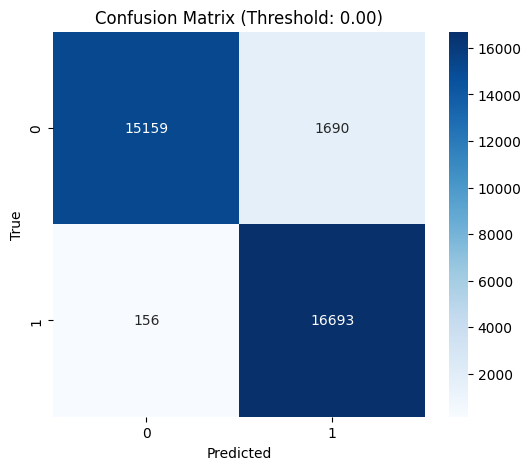

Confusion Matrix at Optimal Threshold (0.00):
[[15159  1690]
 [  156 16693]]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions using the optimal threshold
y_pred_opt = (y_probs > best_threshold).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_valid, y_pred_opt)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix (Threshold: {best_threshold:.2f})')
plt.show()

# Print the confusion matrix values
print(f"Confusion Matrix at Optimal Threshold ({best_threshold:.2f}):")
print(cm)


In [ ]:
import numpy as np
from collections import Counter

# Count the occurrences of each class in y_valid
class_counts = Counter(y_valid)

# Print the counts for each class
print(f"Count of Class 0: {class_counts[0]}")
print(f"Count of Class 1: {class_counts[1]}")

Count of Class 0: 16849
Count of Class 1: 16849


In [ ]:
print(X_train_selected.shape[1])  # Number of features in training
print(df_test_features.shape[1])   # Number of features in test

30


NameError: name 'df_test_features' is not defined

In [ ]:
df_test_features = test_df[features_for_modelling]

df_test_features = df_test_features.reindex(columns=X_train.columns, fill_value=0)

df_test_features_poly = poly.transform(df_test_features)

df_test_features_selected = selector.transform(df_test_features_poly)

df_test_features_selected = df_test_features_selected.astype(np.float32)

test_predictions = model.predict(df_test_features_selected)
test_predictions = (test_predictions > 0.7).astype(int)

test_df['target'] = test_predictions  # Assign predictions to the target column

print(test_df[['ID', 'target']].head())

In [ ]:

# Count the occurrences of each class in the 'target' column
class_counts = test_df['target'].value_counts()

# Print the counts
print(class_counts)


In [ ]:
#Select relevant columns to save
output_df = test_df[['ID', 'target']]

# Save to CSV
output_df.to_csv('predictions.csv', index=False)

## <a id="8"></a>Future Improvements

This baseline model can be improved in several ways:

1. **Handle Class Imbalance**
   - Implement SMOTE or other sampling techniques
   - Try class weights
   - Use different evaluation metrics

2. **Feature Engineering**
   - Create more interaction features
   - Add domain-specific features
   - Investigate feature selection techniques

3. **Model Improvements**
   - Try ensemble methods
   - Implement stacking/blending
   - Use cross-validation instead of train-test split
   - Fine-tune hyperparameters further

4. **Domain-Specific Enhancements**
   - Consider regional differences
   - Add external data if available
   - Incorporate domain knowledge into feature creation

Feel free to fork this notebook and implement these improvements!